In [1]:
import numpy as np 
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import math
np.random.seed(1)
#load the data and break it into the data and the target
boston = load_boston()
df=boston.data
df_target=boston.target

#Let's first take a quick look on our data

data1 = pd.DataFrame(data= np.c_[boston.data, boston.target],
                     columns= np.append(boston.feature_names, ["target"]))
data1.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:


#find the perfect b(coefficients)/ train the model
def coefficient_estimation(x,y):
  #make the multiplications that found on the first part 
  x_T=x.transpose()
  mul=np.matmul(x_T, x)
  mulv = inv(mul)
  # print(mul.shape)
  
  mul2=np.matmul(mulv, x_T)
  # print("HERE ",mul2.shape)
  b=np.matmul(mul2, y)

  #fix the shape of b
  b.shape=(b.shape[0],1)
  # print(b.shape)
  return b

#calculate my estimators
def my_estimator(b,x):
  my_est=[]
  for i in x:
    my_est.append(np.matmul(b,i)[0])
  return my_est

#calculate both rse and rss to valuate my estimations
def rse_rss(y,y_est):
  sum=pow(y[:]-y_est[:],2)
  total_sum=np.sum(sum)
  total=math.sqrt(total_sum/y.shape[0])
  # print(total)
  
  return total,total_sum

#calculate the tss
def tss(y):
  y_mean = y.mean()
  sum=pow(y[:]-y_mean,2)
  total_sum=np.sum(sum)
  return total_sum

#the percentages that I choose
my_percentage=[0.30,0.20,0.10]
my_R_2_train=[]
my_R_2_test=[]
my_RSE_train=[]
my_RSE_test=[]
#split the data into train_set and test_set

for i in my_percentage:
  print(i*100,"%")
  X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=i, shuffle=False, random_state=42)
  # print(X_test)
  # print(y_test)

  #calculate my coefficients
  coefficients=coefficient_estimation(X_train, y_train)
  #find the estimators(my values/predictions for y) for my train and test set 
  estimations_train=my_estimator(coefficients.transpose(),X_train)
  estimations_test=my_estimator(coefficients.transpose(),X_test)
  # print(estimations)
  #calculate the rse metric and the rss
  rse_train_result,rss_train_result=rse_rss(y_train,estimations_train)
  rse_test_result,rss_test_result=rse_rss(y_test,estimations_test)
  #find the tss
  tss_train=tss(y_train)
  tss_test=tss(y_test)
  #using the rss and the tss compute the R^2 metric(R_2=1-(RSS/TSS))
  R_2_train=1-(rss_train_result/tss_train)
  R_2_test=1-(rss_test_result/tss_test)

  #print the results
  print("Coefficients= ",coefficients.tolist())
  print("RSE_train= ",rse_train_result)
  print("RSE_test= ",rse_test_result)
  print("R^2_train= ",R_2_train)
  print("R^2_test= ",R_2_test)
  my_RSE_train.append(rse_train_result)
  my_RSE_test.append(rse_test_result)
  my_R_2_train.append(R_2_train)
  my_R_2_test.append(R_2_test)


30.0 %
Coefficients=  [[1.3344527998915634], [0.014824196482409506], [0.04471411303565245], [0.6815711590384717], [-14.70666052000142], [8.502139478067619], [-0.039705439391366476], [-1.0693129353134556], [0.15332138326767636], [-0.016154406347815987], [-0.780753626078002], [0.009840341499823997], [-0.1409527235812277]]
RSE_train=  3.0362729656740846
RSE_test=  23.684882570077082
R^2_train=  0.8701321907447673
R^2_test=  -7.455240078480475
20.0 %
Coefficients=  [[-0.21945097770046812], [0.045443181812540895], [0.03428691545270798], [1.922140413453159], [-1.712584798585628], [6.227665559728174], [-0.003957267206109651], [-0.9313504210611976], [0.3456261466571746], [-0.012697923960708882], [-0.4345762203735335], [0.011105166644410209], [-0.4603457969823875]]
RSE_train=  4.914702703381751
RSE_test=  5.606184407129468
R^2_train=  0.7176732068245825
R^2_test=  -0.16888096128617613
10.0 %
Coefficients=  [[-0.09082442932367307], [0.052039889259322396], [0.008940573513050568], [2.6349794314129

# Comments For our Estimations
In general we can see that the orange (estimations) dots are very close to the blue ones (True values) in the case of the train set. In some features we can detect some distance (RM) but in general we have good results.
On the other hand in the test set we can see that the orange points are far from the blue ones. This means that our estimations are not so good as those we had on the train set.

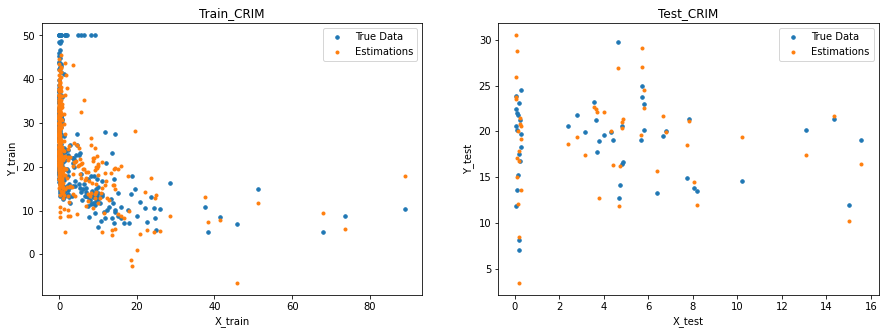

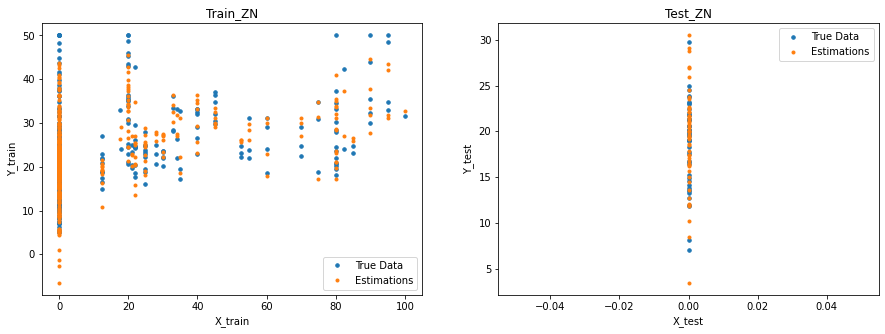

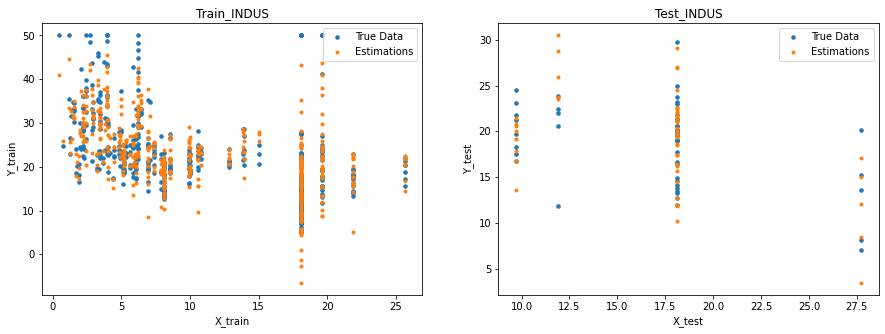

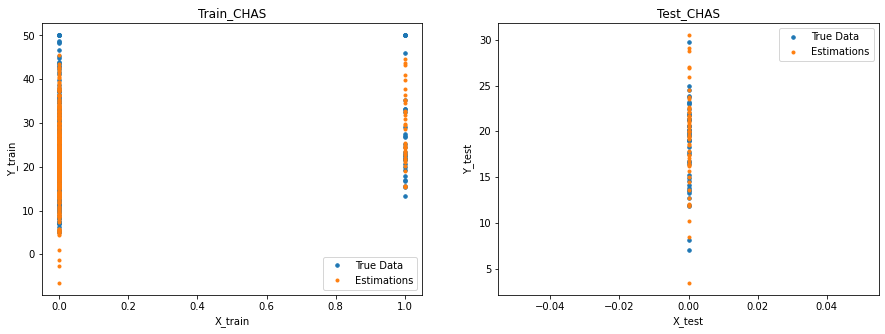

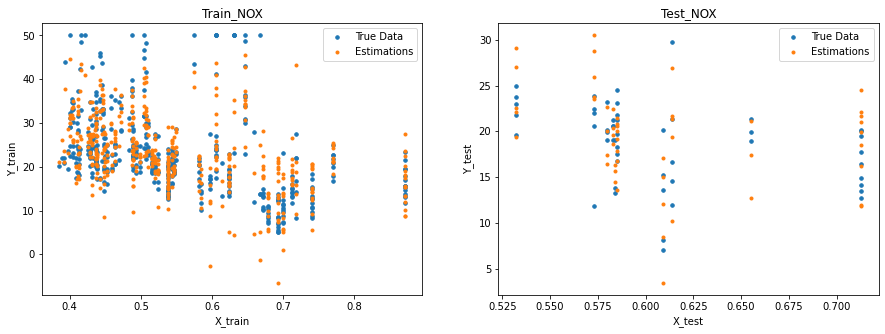

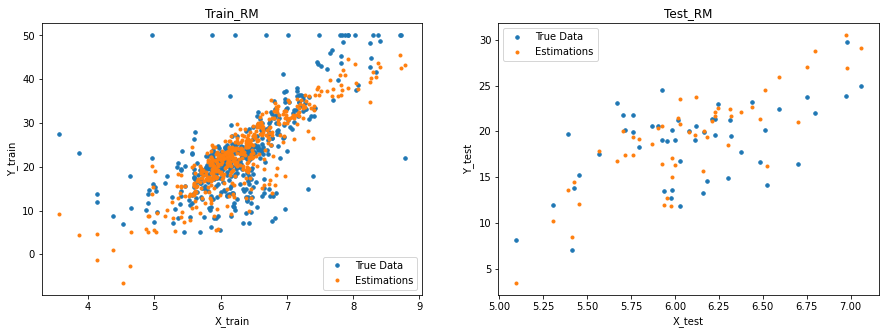

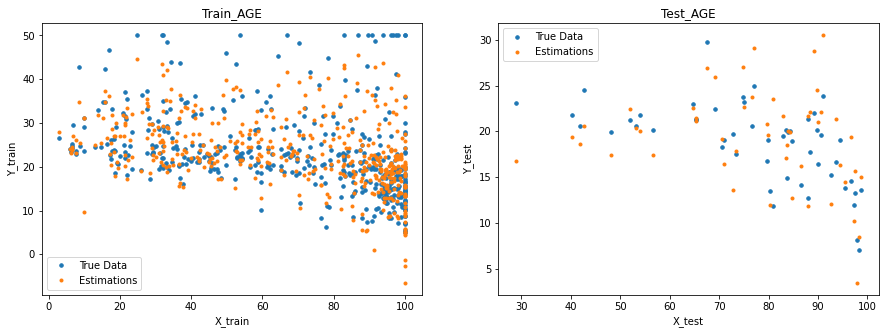

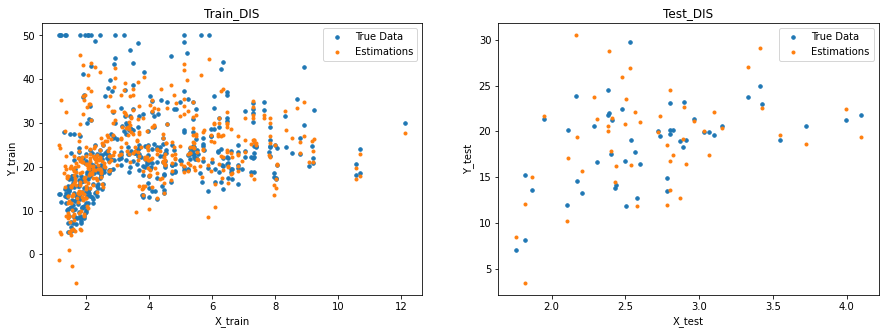

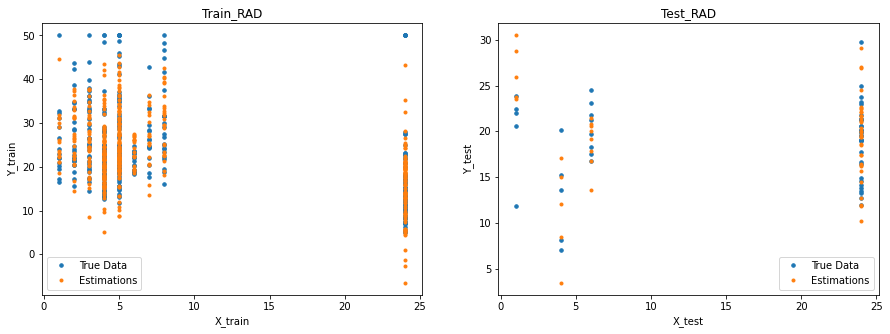

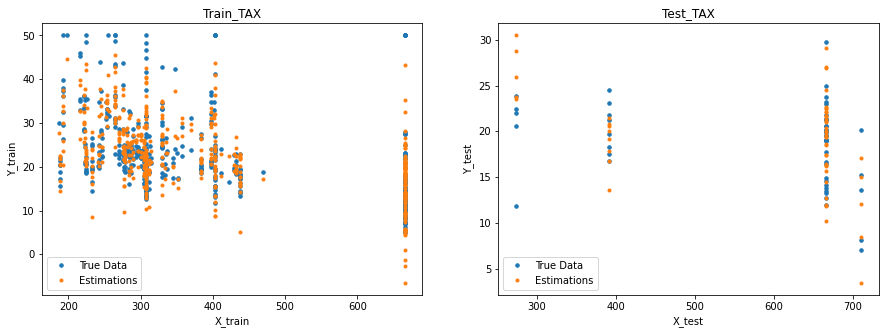

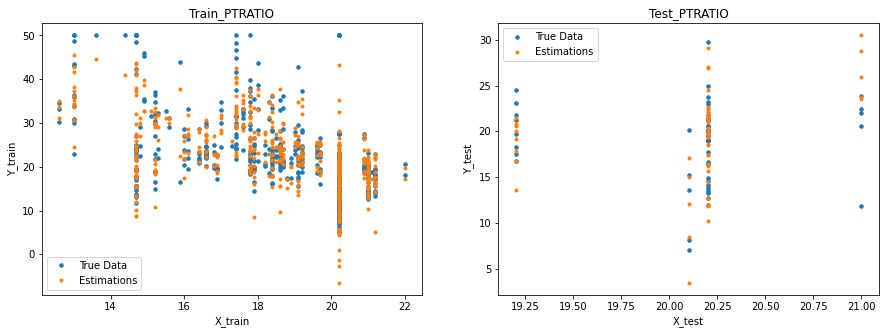

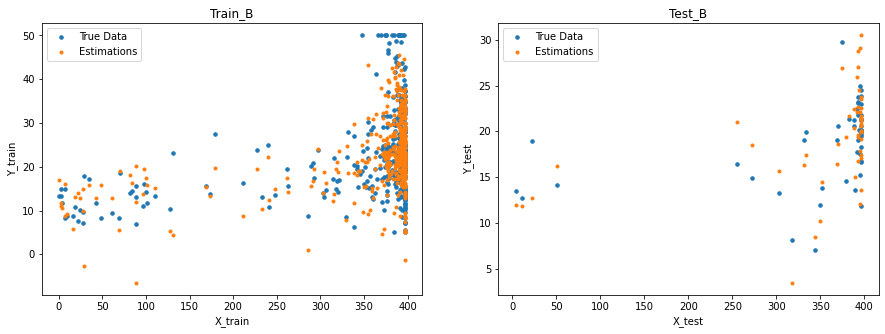

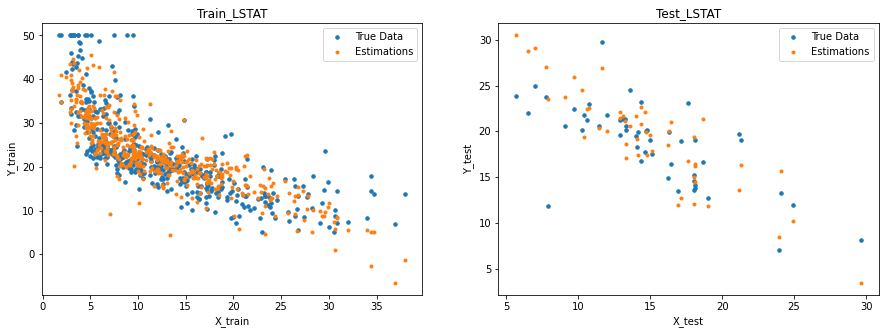

In [5]:

#les't first see how good our train/test estimations were, based on each of the 13 features
for i in range(X_train.shape[1]):
  fig, (train,test) = plt.subplots(1,2,figsize=(15,5))
  # plt.subplot(1, 2, 1)
  train.plot(X_train[:,i], y_train, '.', markersize = 7)
  train.plot(X_train[:,i], estimations_train,'.')
  train.legend(['True Data', 'Estimations'])
  train.set_xlabel('X_train')
  train.set_ylabel('Y_train')
  train.set_title("Train_"+boston.feature_names[i])
  # plt.subplot(1, 2, 2)
  test.plot(X_test[:,i], y_test, '.', markersize = 7)
  test.plot(X_test[:,i], estimations_test,'.')
  test.legend(['True Data', 'Estimations'])
  test.set_xlabel('X_test')
  test.set_ylabel('Y_test')
  test.set_title("Test_"+boston.feature_names[i])
  fig.show()
# plt.plot(x, line, 'green', linewidth = 3)

#2 Difference in RSE, R_2 between train and test 
With the above implementation we produce 4 bar graphs for the 3 percents we examined (**30%, 20%, 10%**). The 4 graph represents the values of RSE for the train and the test set (1st row) and the values for the R^2 metric, again for both train and test set (2nd row).

As we can see from the above results the test set does not give us as good values as the train set for both metrics(RSE, R_2). This make sense because **our coefficients are produced based on the train set**. In a few words, we created a b_array that is designed to produce the best possibly similar results for each individual in our train set. Now if we get **the previous coefficients** and apply them **on our test_set**, again we can get some good estimations but definitely **not as good as the estimations we got before**. The fit we did for the b_array was based on the train set. If we use this b_array on our test set, which has the same pattern as the train set (but is not the same), we can expect some close results.


# 3 My percentages (30%, 20%, 10%)

Again here (almost) all the results make sense. The more the percentage we have on the test set the smaller our train set will eventually be. This means that **the less the train set we have the more fitted our coefficients will be** on the train set. This is happening because on the 70%-30% split the train set won't have as much variety of data and different individual cases, as it has on the 90%-10% case. This means that the train set would have **fewer individuals** and eventually it makes it easier for our model to create **coefficients that fit the data VERY MUCH**.


This phenomenon is called **overfitting**. So what happens is that our **b_array is SO MUCH fitted** on our train set that will give us **VERY GOOD RESULTS**. But if we use it **on our test set the results would be awful** (as we can see from the diagrams), because the b_array loses its general form and becomes something very specific, designed only to fit our smaller train set.


That's the reason why we have better results for the train set as we increase the percentage of the test set (which decrease the percentage of the train set). Additionally, when the train set is small we have overfitting, and the produced coefficients won't be possible to produce good estimations for the test set.


Last observation I want to menssion is the **negative values on R_2 Test**. This happens because the estimation we have from the test set are really, really bad and the **RSS BECOMES LARGER than the TSS**. This makes the fraction **RSS/TSS bigger than 1**, and this leads us to the negative results on our calculation(**1-RSS/TSS<0**). **These values are correct they appear to be a problem were the chosen train cannot provide estimators for the chosen test individuals**. I asked also other students to test the specific split format **train_test_split(df, df_target, test_size=i, shuffle=False, random_state=42)** and they also had the same problem(R^2=-7 when it has to have a value between [0-1]). I used this format to have as standar results as possible in order to review some standar results. This is the reason why I don't use the shuffle parameter and have a static random_state.



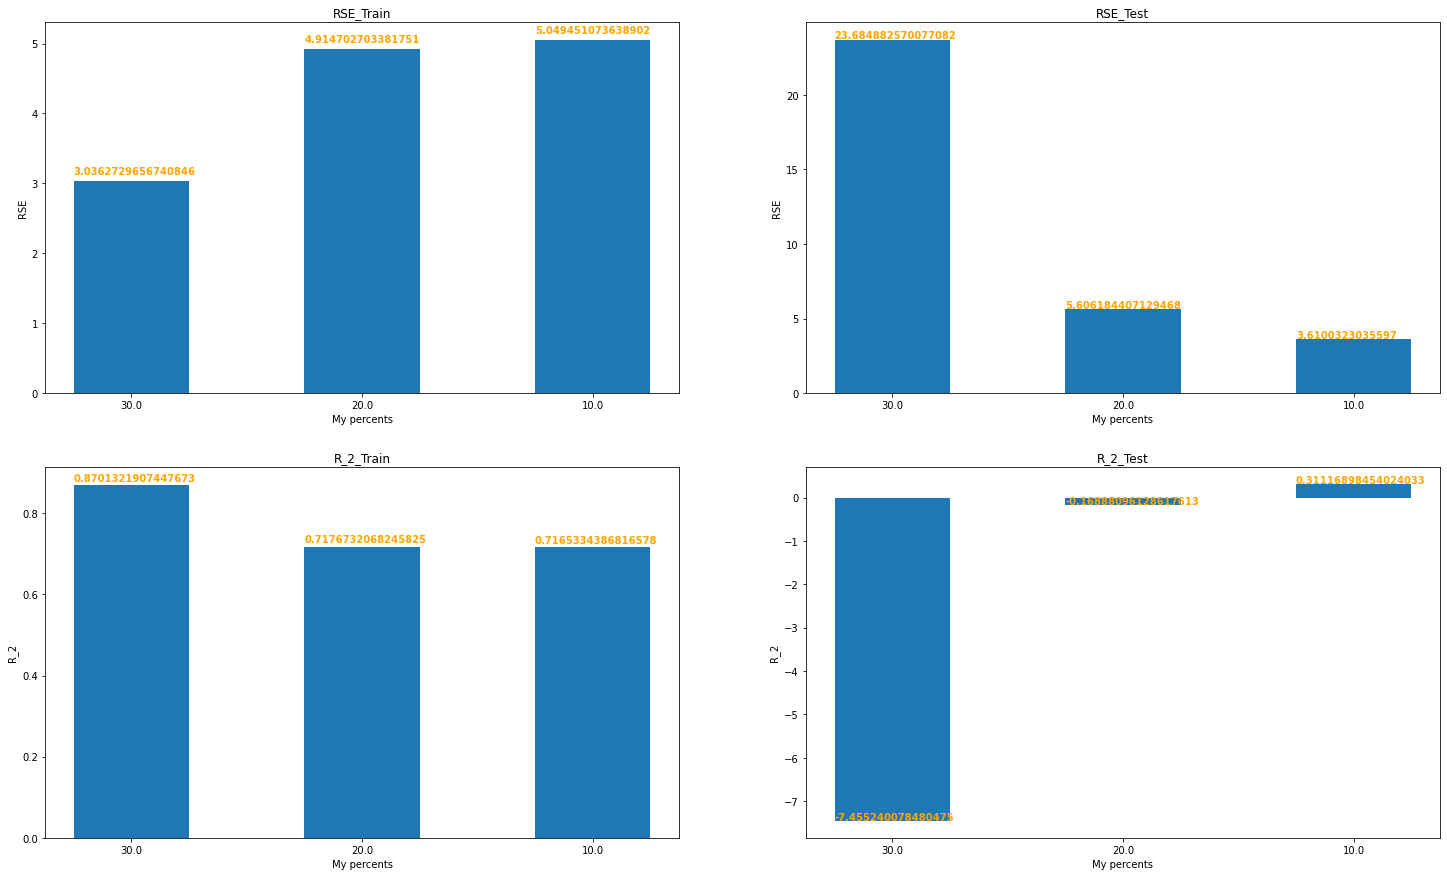

In [7]:
def my_plots(my_RSE_train,my_RSE_test,my_R_2_train,my_R_2_test):
  fig, ((RSS_tr,RSS_te),(R_2_tr,R_2_te)) = plt.subplots(2,2,figsize=(25,15))

  # Plot accuracy of each fold
  pers=[]
  for i in my_percentage:
    pers.append(str(i*100))

  RSS_tr.bar(pers,my_RSE_train,width=0.5)
  RSS_tr.set_ylabel('RSE')
  RSS_tr.set_xlabel('My percents')
  RSS_tr.set_title('RSE_Train')
  for i, v in enumerate(my_RSE_train):
      RSS_tr.text( i-.25 ,v+.10 , str(v), 
              color = 'orange', fontweight = 'bold')

  RSS_te.bar(pers,my_RSE_test,width=0.5)
  RSS_te.set_ylabel('RSE')
  RSS_te.set_xlabel('My percents')
  RSS_te.set_title('RSE_Test')
  for i, v in enumerate(my_RSE_test):
      RSS_te.text( i-.25 ,v+.10 , str(v), 
              color = 'orange', fontweight = 'bold')

  R_2_tr.bar(pers,my_R_2_train,width=0.5)
  R_2_tr.set_ylabel('R_2')
  R_2_tr.set_xlabel('My percents')
  R_2_tr.set_title('R_2_Train')
  for i, v in enumerate(my_R_2_train):
      R_2_tr.text( i-.25 ,v+.01 , str(v), 
              color = 'orange', fontweight = 'bold')

  R_2_te.bar(pers,my_R_2_test,width=0.5)
  R_2_te.set_ylabel('R_2')
  R_2_te.set_xlabel('My percents')
  R_2_te.set_title('R_2_Test')
  for i, v in enumerate(my_R_2_test):
      R_2_te.text( i-.25 ,v+.01 , str(v), 
              color = 'orange', fontweight = 'bold')
  plt.show()    

my_plots(my_RSE_train,my_RSE_test,my_R_2_train,my_R_2_test)



# This is a test to see how different my coefficients are from those that sklearn produces

In [ ]:
from sklearn.linear_model import LinearRegression

#this is a test to see how different my coefficients are from those that sklearn produces
regression = LinearRegression().fit(X_train,y_train)
coeffs = regression.coef_
intercept = regression.intercept_

print(coeffs.tolist())

[-0.10657433683315468, 0.049103183123645686, 0.03211872470876399, 2.5088396306603995, -17.582855083974362, 3.8228150515819386, 0.010514185300088796, -1.4343566733708084, 0.36235319949216716, -0.015482834064332901, -0.9113623332933042, 0.009713409928750971, -0.5550410150708666]


# My Combinations of features
CHAS-NOX-RM

CHAS-DIS-RM

ZN-NOX-TAX

NOX-RAD-TAX

INDUS-DIS-AGE

NOX-DIS-AGE-PTRATIO

*see the report for more informations*

CHAS-NOX-RM
RSE_TRAIN=  [5.228206477817937, 6.447124585191647, 6.512329838166052]
RSE_TEST=  [8.457193891557486, 5.976897776518582, 3.4447960366328068]
R_2_TRAIN=  [0.6149427093335561, 0.5141639729538762, 0.5284950289744161]
R_2_TEST=  [-0.07804290756397148, -0.3285783861181244, 0.3727834014473428]


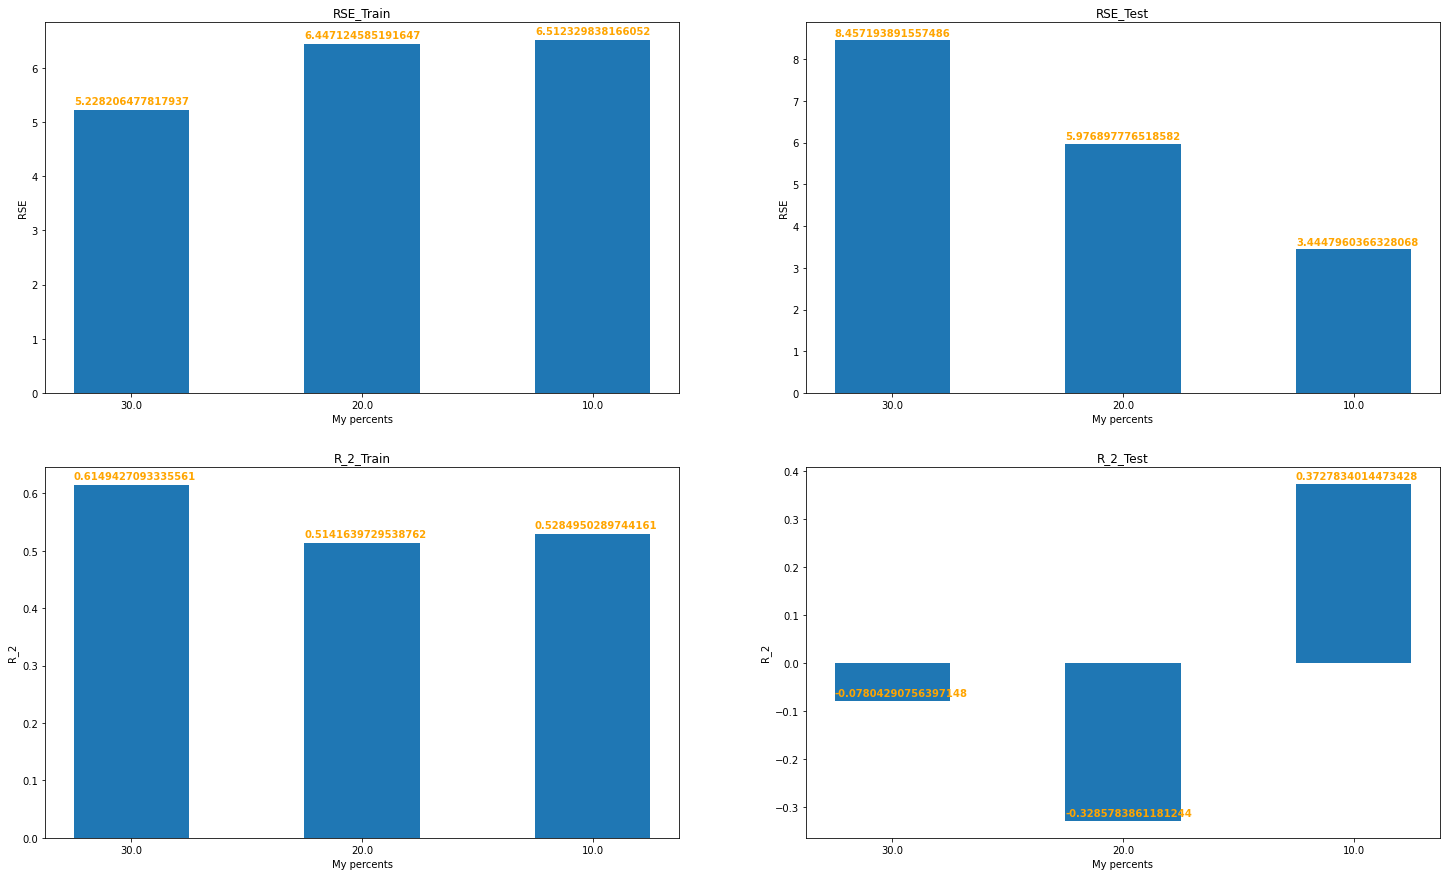

CHAS-DIS-RM
RSE_TRAIN=  [6.071098219535028, 7.323973531369923, 7.69895336652289]
RSE_TEST=  [11.613219484793753, 9.00366415786994, 4.711844095254347]
R_2_TRAIN=  [0.48077642022535694, 0.3730237015335647, 0.34101295553255573]
R_2_TEST=  [-1.0327723277583667, -2.014908255747429, -0.17347094667573892]


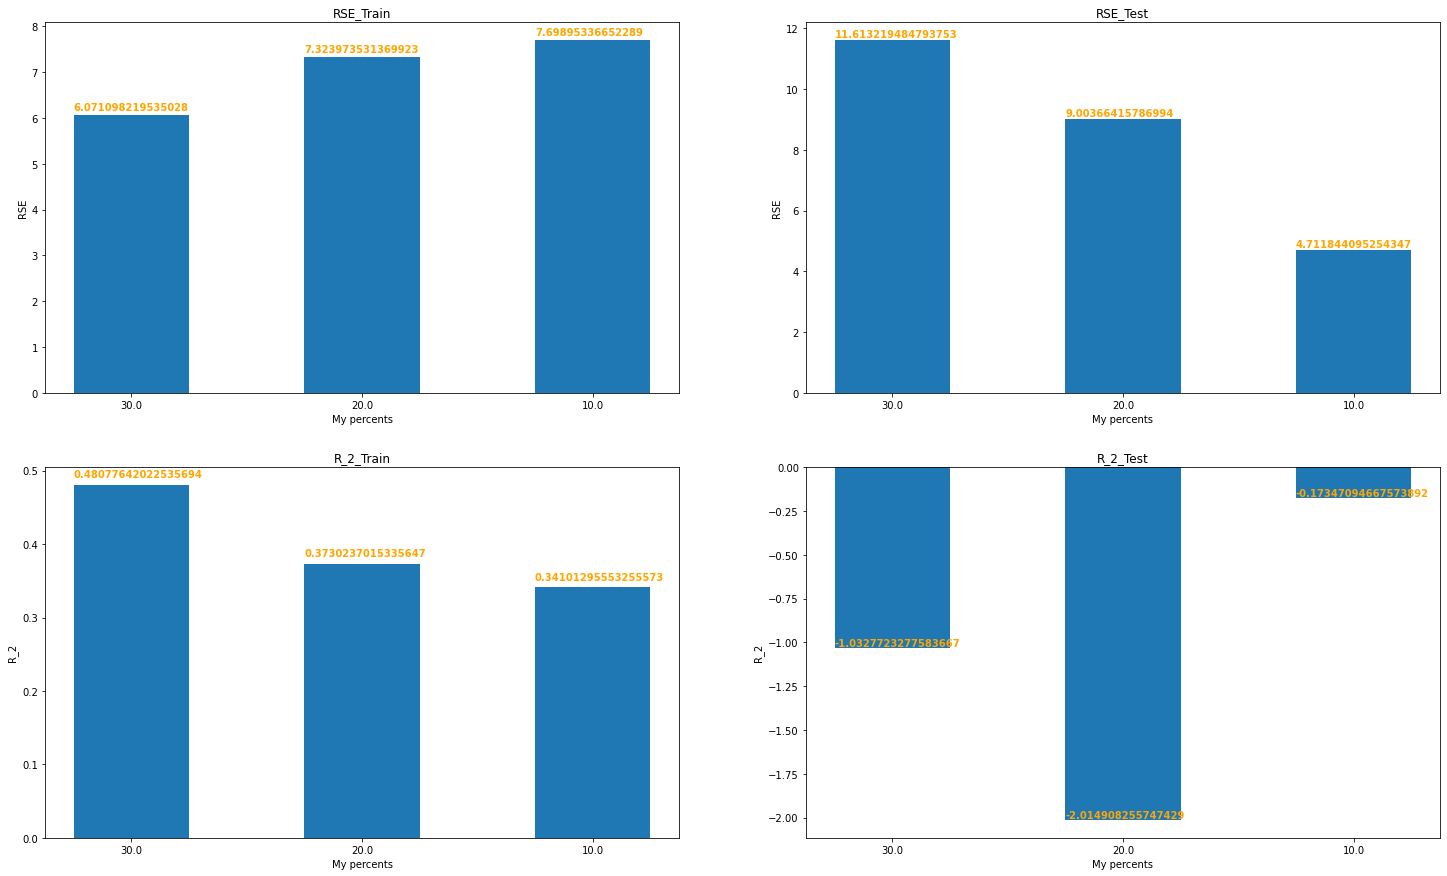

ZN-NOX-TAX
RSE_TRAIN=  [9.218822828320986, 9.990952745799573, 9.816204231112168]
RSE_TEST=  [14.40156964622115, 7.87467509235079, 6.994233083017377]
R_2_TRAIN=  [-0.19721135195419826, -0.16673278359954402, -0.07127425861363457]
R_2_TEST=  [-2.1261018959777958, -1.306220426829765, -1.5856558473816889]


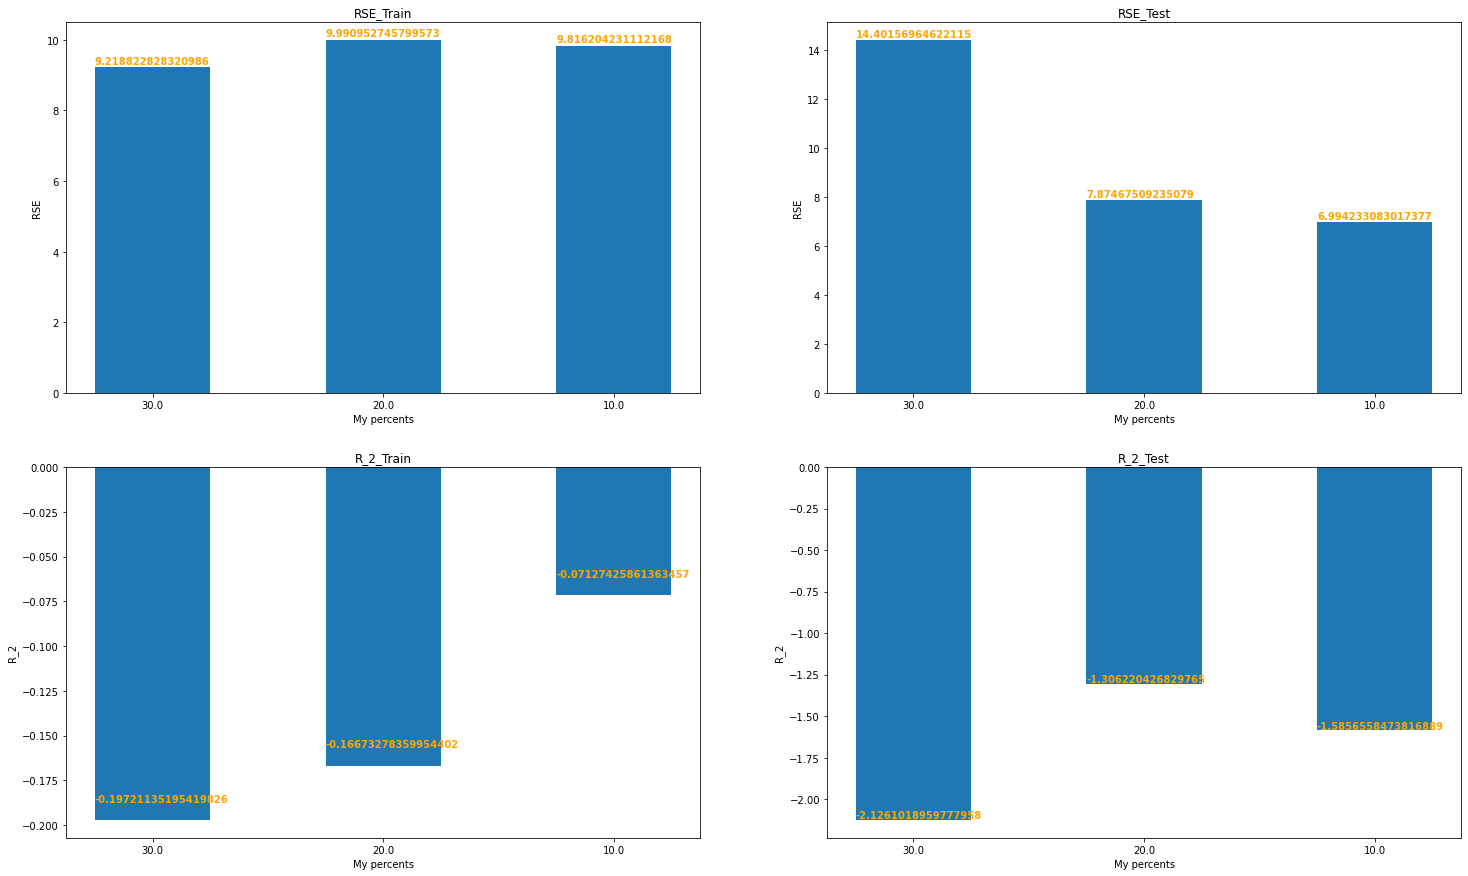

NOX-RAD-TAX
RSE_TRAIN=  [10.121762650502466, 11.327489953880434, 10.973865178617148]
RSE_TEST=  [48.99385798434621, 9.006010152673749, 9.878990110158542]
R_2_TRAIN=  [-0.44321883235099513, -0.49977103798248135, -0.33885251581721665]
R_2_TEST=  [-35.17984898759356, -2.016479589471799, -4.158407160326102]


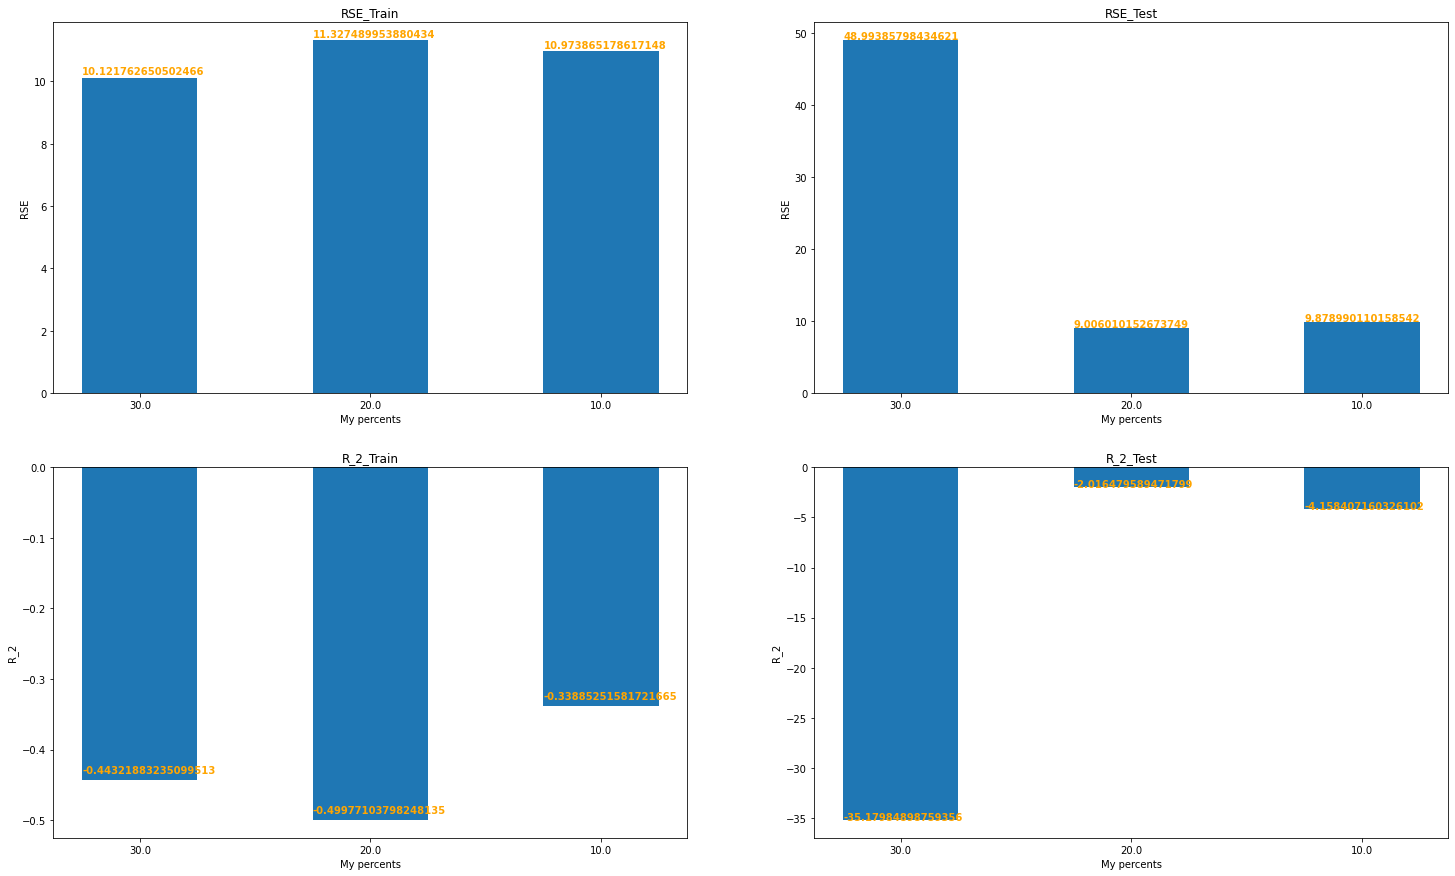

INDUS-DIS-AGE
RSE_TRAIN=  [10.476747513991418, 10.807412910346745, 10.491927377781156]
RSE_TEST=  [9.780751074696337, 7.155798120489982, 5.341485089144391]
R_2_TRAIN=  [-0.546225546658154, -0.36521509132469876, -0.22383832771435763]
R_2_TEST=  [-0.4418759030537589, -0.9043715558849599, -0.5080458925208169]


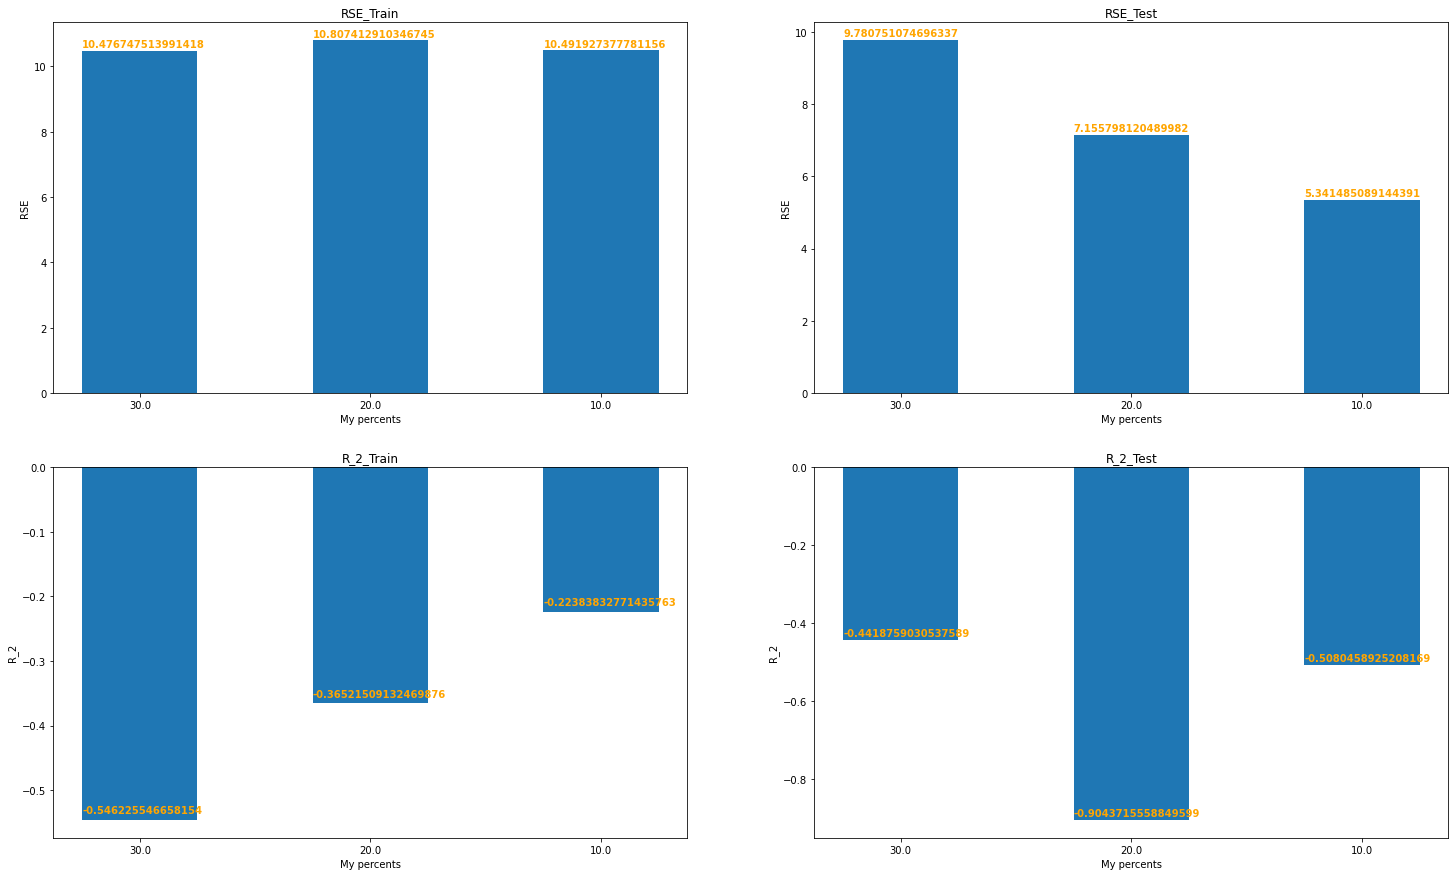

NOX-DIS-AGE-PTRATIO
RSE_TRAIN=  [9.363425068833973, 10.106486282919896, 10.100109198663366]
RSE_TEST=  [12.5927951824436, 9.121932893931277, 4.950546361941287]
R_2_TRAIN=  [-0.23506372927762165, -0.19387256722075663, -0.1341373077302832]
R_2_TEST=  [-1.3901642777357592, -2.094633857002351, -0.29537878872780987]


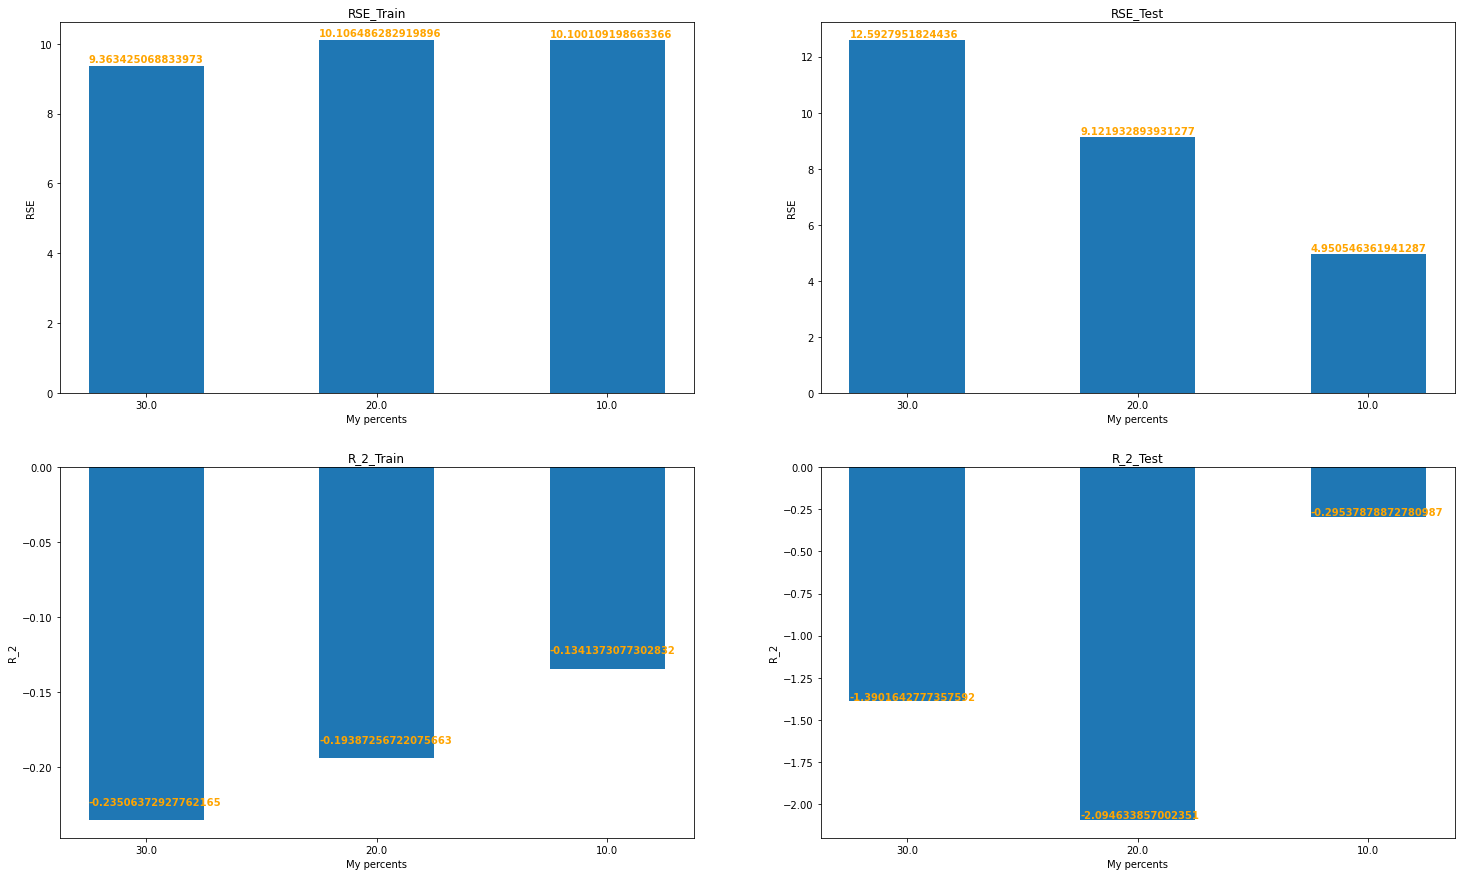

In [8]:

def my_calcualtor(my_data):
  my_percentage=[0.30,0.20,0.10]
  my_R_2_train=[]
  my_R_2_test=[]
  my_RSE_train=[]
  my_RSE_test=[]
  #split the data into train_set and test_set
  for i in my_percentage:
    X_train, X_test, y_train, y_test = train_test_split(my_data, df_target, test_size=i, shuffle=False, random_state=42)
    #calculate my coefficients
    coefficients=coefficient_estimation(X_train, y_train)
    # print(X_train.shape)
    # print(coefficients.transpose().shape)
    #find the estimators(my values/predictions for y) for my train and test set 
    estimations_train=my_estimator(coefficients.transpose(),X_train)
    estimations_test=my_estimator(coefficients.transpose(),X_test)
    # print(estimations)
    #calculate the rse metric and the rss
    rse_train_result,rss_train_result=rse_rss(y_train,estimations_train)
    rse_test_result,rss_test_result=rse_rss(y_test,estimations_test)
    #find the tss
    tss_train=tss(y_train)
    tss_test=tss(y_test)
    #using the rss and the tss compute the R^2 metric(R_2=1-(RSS/TSS))
    R_2_train=1-rss_train_result/tss_train
    R_2_test=1-rss_test_result/tss_test

   
    my_RSE_train.append(rse_train_result)
    my_RSE_test.append(rse_test_result)
    my_R_2_train.append(R_2_train)
    my_R_2_test.append(R_2_test)

  print("RSE_TRAIN= ",my_RSE_train)
  print("RSE_TEST= ",my_RSE_test)
  print("R_2_TRAIN= ",my_R_2_train)
  print("R_2_TEST= ",my_R_2_test)
  my_plots(my_RSE_train,my_RSE_test,my_R_2_train,my_R_2_test)  


#doing the prossess for fewer than 13 features
######################################################
#evaluation for the 3 features 'CHAS', 'NOX','RM' this is my best combination with fewer features
######################################################
sample_colmn = data1[['CHAS', 'NOX','RM' ]].copy()

my_data=sample_colmn.to_numpy()
print('CHAS-NOX-RM')  
my_calcualtor(my_data)
######################################################
#evaluation for the 3 features 'CHAS', 'DIS','RM'
sample_colmn = data1[['CHAS', 'DIS','RM' ]].copy()

my_data=sample_colmn.to_numpy()
print('CHAS-DIS-RM')  
my_calcualtor(my_data)

#evaluation for the 3 features 'ZN', 'NOX','TAX'
sample_colmn = data1[['ZN', 'NOX','TAX' ]].copy()

my_data=sample_colmn.to_numpy()
print('ZN-NOX-TAX')  
my_calcualtor(my_data)

#evaluation for the 3 features 'NOX', 'RAD','TAX'
sample_colmn = data1[['NOX', 'RAD','TAX' ]].copy()

# sample_colmn.head()
my_data=sample_colmn.to_numpy()
print('NOX-RAD-TAX')  
my_calcualtor(my_data)

#evaluation for the 3 features 'INDUS', 'DIS','AGE'
sample_colmn = data1[['INDUS', 'DIS','AGE' ]].copy()

# sample_colmn.head()
my_data=sample_colmn.to_numpy()
print('INDUS-DIS-AGE')  
my_calcualtor(my_data)

#evaluation for the 4 features 'NOX', 'DIS','AGE','PTRATIO'
sample_colmn = data1[['NOX', 'DIS','AGE','PTRATIO' ]].copy()

# sample_colmn.head()
my_data=sample_colmn.to_numpy()
print('NOX-DIS-AGE-PTRATIO')  
my_calcualtor(my_data)

# Correlation
The correlation between 2 features A and B describes a relation between them. If we have **positive correlation** this means that if the feature A is increasing then feature B will also increase or if the A is decreasing then B will also decrease. On the other side if we have **negative correlation**, when the A increases then Feature B decreases, and the other way around. If the **correlation is 0** it means that there is no relationship at all.

In a few words this **matshow will show** us which features have **similar/opposite behavior**, and which of them are **completely strangers**. This also justifies the fact that our diagonal has the most positive correlation values, since we compare each feature with itself.

             CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
CRIM     1.000000 -0.200469  0.406583  ...  0.289946 -0.385064  0.455621
ZN      -0.200469  1.000000 -0.533828  ... -0.391679  0.175520 -0.412995
INDUS    0.406583 -0.533828  1.000000  ...  0.383248 -0.356977  0.603800
CHAS    -0.055892 -0.042697  0.062938  ... -0.121515  0.048788 -0.053929
NOX      0.420972 -0.516604  0.763651  ...  0.188933 -0.380051  0.590879
RM      -0.219247  0.311991 -0.391676  ... -0.355501  0.128069 -0.613808
AGE      0.352734 -0.569537  0.644779  ...  0.261515 -0.273534  0.602339
DIS     -0.379670  0.664408 -0.708027  ... -0.232471  0.291512 -0.496996
RAD      0.625505 -0.311948  0.595129  ...  0.464741 -0.444413  0.488676
TAX      0.582764 -0.314563  0.720760  ...  0.460853 -0.441808  0.543993
PTRATIO  0.289946 -0.391679  0.383248  ...  1.000000 -0.177383  0.374044
B       -0.385064  0.175520 -0.356977  ... -0.177383  1.000000 -0.366087
LSTAT    0.455621 -0.412995  0.603800  ...  0.37404

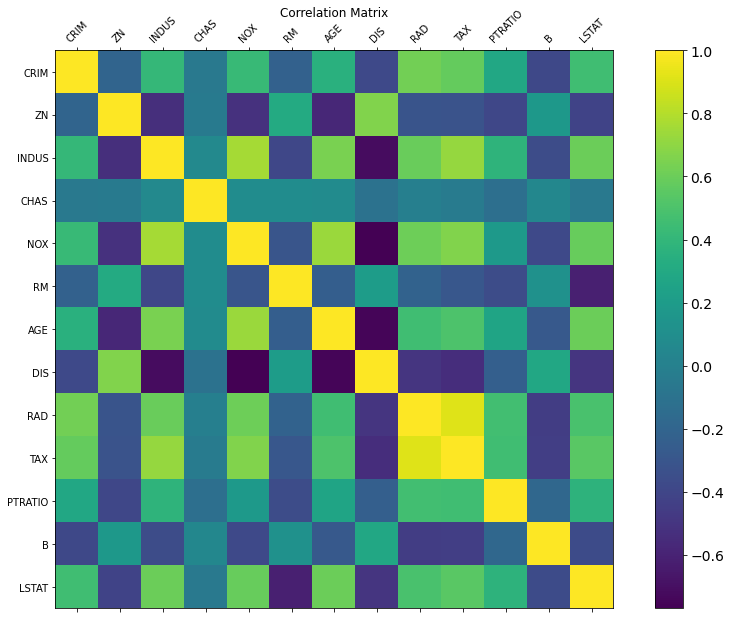

In [9]:


dt_without_target=data1.drop(['target'], axis=1)
corrMatrix = dt_without_target.corr()
print (corrMatrix)
# plt.matshow(corrMatrix)
# plt.colorbar()
# # plt.set_xticklabels(['']+dt_without_target.feature_names)
# # plt.set_yticklabels(['']+dt_without_target.feature_names)
# plt.show()

f = plt.figure(figsize=(15, 10))
plt.matshow(corrMatrix,fignum=f.number)
plt.xticks(np.arange(13), ['']+dt_without_target.columns,  rotation=45)
plt.yticks(np.arange(13), ['']+dt_without_target.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix');